In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#Lectura de archivo gracias a la librería pandas
archivo = pd.read_csv("alzheimers_disease_data.csv")
archivo = archivo.drop("DoctorInCharge",axis=1)

### Modelo de Naive bayes Gauss.

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       277
           1       0.75      0.82      0.79       153

    accuracy                           0.84       430
   macro avg       0.82      0.84      0.83       430
weighted avg       0.84      0.84      0.84       430



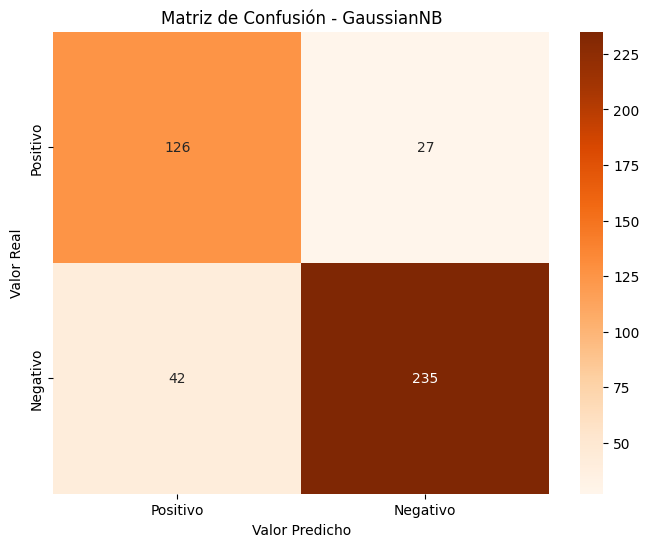

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

#Separación de variable objetivo de los demás atributos.
X = archivo.drop('Diagnosis', axis=1)
y = archivo['Diagnosis']

#División de datos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Balancear el conjunto de entrenamiento.
ros = RandomOverSampler(random_state=0)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

#Escalar datos.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced) 
X_test_scaled = scaler.transform(X_test)

#Entrenamiento del modelo
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train_balanced) 

y_pred = nb_model.predict(X_test_scaled)

accuracy_NB = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred,labels=[1,0] )

#Reporte
class_report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(class_report)

#Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges',
           xticklabels=['Positivo', 'Negativo'],
           yticklabels=['Positivo', 'Negativo'])
plt.title('Matriz de Confusión - GaussianNB')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

precision_NB = precision_score(y_test, y_pred)
recall_NB = recall_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred)
tn_nb, fp_nb, fn_nb, tp_nb = conf_matrix.ravel()


### Modelo de Naive Bayes Bernoulli.

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       277
           1       0.76      0.85      0.80       153

    accuracy                           0.85       430
   macro avg       0.84      0.85      0.84       430
weighted avg       0.86      0.85      0.86       430



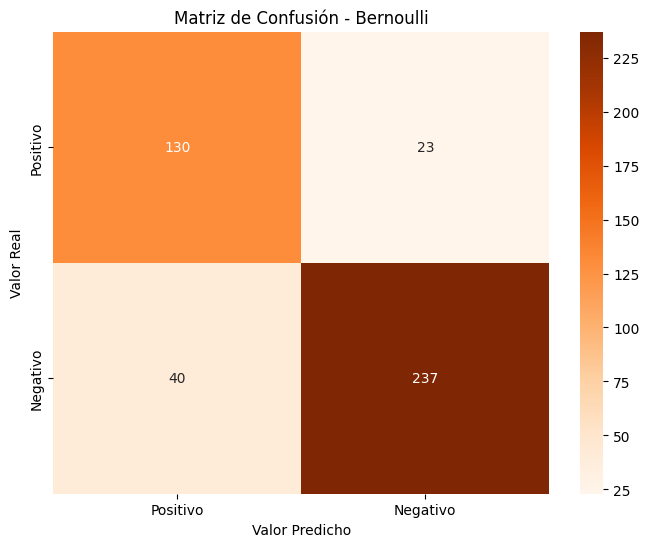

In [ ]:
from sklearn.naive_bayes import BernoulliNB

#Separación de variable objetivo de los demás atributos.
X = archivo.drop('Diagnosis', axis=1)
y = archivo['Diagnosis']

#División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Balancear el conjunto de entrenamiento
ros = RandomOverSampler(random_state=0)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

#Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced) 
X_test_scaled = scaler.transform(X_test)

#Entrenar modelo.
Bernoulli_model = BernoulliNB()

Bernoulli_model.fit(X_train_scaled, y_train_balanced) 

y_pred = Bernoulli_model.predict(X_test_scaled)

accuracy_BNB = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])

#Reporte
class_report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(class_report)

#Matriz de confusión con orden modificado
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Positivo', 'Negativo'],  
            yticklabels=['Positivo', 'Negativo'])  
plt.title('Matriz de Confusión - Bernoulli')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

precision_BNB = precision_score(y_test, y_pred)
recall_BNB = recall_score(y_test, y_pred)
f1_bnb = f1_score(y_test, y_pred)
tn_bnb, fp_bnb, fn_bnb, tp_bnb = conf_matrix.ravel()

### Modelo de Naive Bayes Multinomial.

0.7488372093023256
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       277
           1       0.66      0.62      0.64       153

    accuracy                           0.75       430
   macro avg       0.73      0.72      0.72       430
weighted avg       0.75      0.75      0.75       430



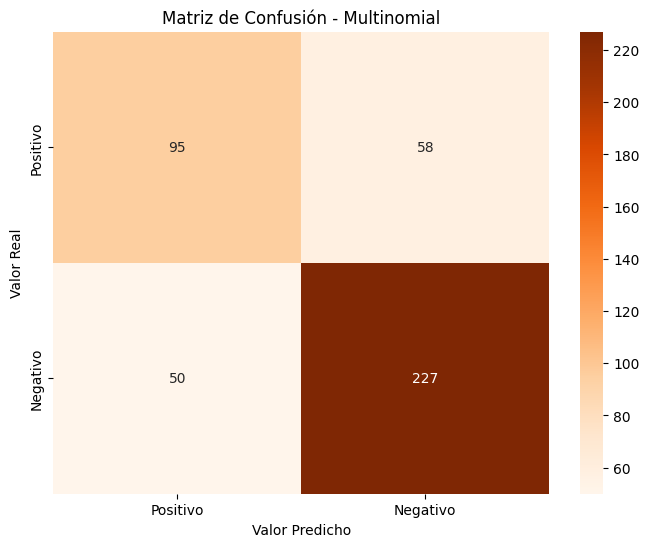

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler #Uso de minmax para tener valores en rango [0,1], dado que, Naive-Bayes Multinomial no acepta números negativos.

#Separación de variable objetivo de los demás atributos
X = archivo.drop('Diagnosis', axis=1)
y = archivo['Diagnosis']

#División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Balancear el conjunto de entrenamiento
ros = RandomOverSampler(random_state=0)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

#Escalar datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

#Entrenar modelo
multinomial_model = MultinomialNB()
multinomial_model.fit(X_train_scaled, y_train_balanced) 

y_pred = multinomial_model.predict(X_test_scaled)

accuracy_multinomial = accuracy_score(y_test, y_pred)
print(accuracy_multinomial)

conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])

#Reporte
class_report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(class_report)

#Matriz de confusión con orden modificado
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Positivo', 'Negativo'],  
            yticklabels=['Positivo', 'Negativo'])  
plt.title('Matriz de Confusión - Multinomial')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

precision_multinomial = precision_score(y_test, y_pred)
recall_multinomial = recall_score(y_test, y_pred)
f1_multinomial = f1_score(y_test, y_pred)
tn_multinomial, fp_multinomial, fn_multinomial, tp_multinomial = conf_matrix.ravel()


### Modelo de KNN.

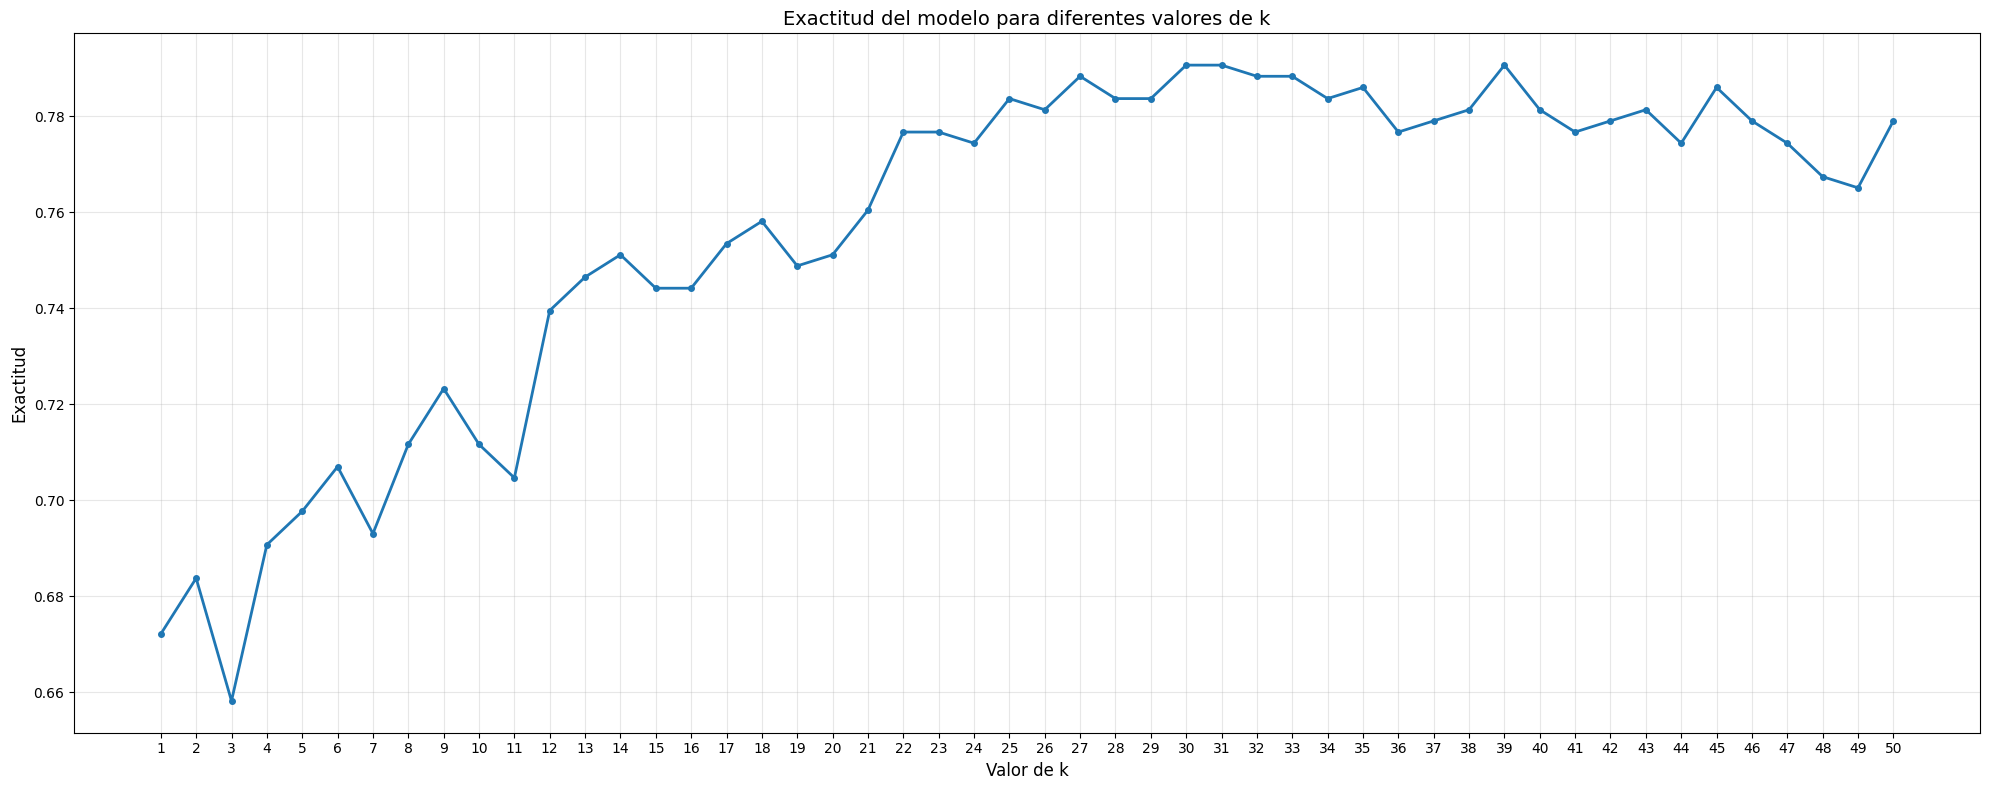

Mejor k encontrado: 30
Exactitud correspondiente: 0.7907
Otros k con la misma exactitud: [30, 31, 39]
Se eligió k=30 (el más pequeño para mayor simplicidad)

Exactitud del modelo final: 0.7907


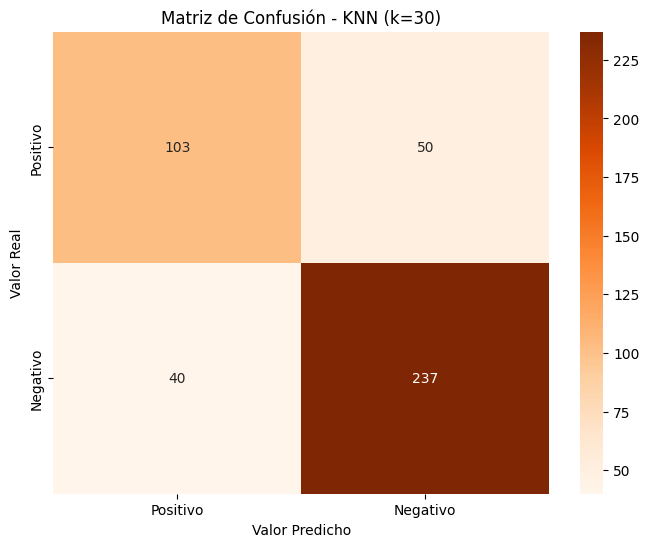


Reporte de clasificación final:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       277
           1       0.72      0.67      0.70       153

    accuracy                           0.79       430
   macro avg       0.77      0.76      0.77       430
weighted avg       0.79      0.79      0.79       430



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Separación variable objetivo de los demás atributos
X = archivo.drop('Diagnosis', axis=1)
y = archivo['Diagnosis']

#Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Balancear conjunto de entrenamiento
ros = RandomOverSampler(random_state=0)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

#Estandarizar data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

k_range = range(1, 51)
scores = []

#Buscar mejor "n" y guardar sus valores para posteriormente graficarlos
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_balanced)
    y_pred_k = knn.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_pred_k))

#Muestra en un gráfico el desempeño de KNN 
plt.figure(figsize=(20, 8))
plt.plot(k_range, scores, marker='o', linewidth=2, markersize=4)
plt.title('Exactitud del modelo para diferentes valores de k', fontsize=14)
plt.xlabel('Valor de k', fontsize=12)
plt.ylabel('Exactitud', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.tight_layout()
plt.show()

best_score = max(scores)
best_k = k_range[scores.index(best_score)]

#Mostrar información del mejor k
print(f"Mejor k encontrado: {best_k}")
print(f"Exactitud correspondiente: {best_score:.4f}")

#Verificar si hay múltiples k con la misma exactitud máxima
best_k_candidates = [k for k, score in zip(k_range, scores) if score == best_score]
if len(best_k_candidates) > 1:
    print(f"Otros k con la misma exactitud: {best_k_candidates}")
    print(f"Se eligió k={best_k} (el más pequeño para mayor simplicidad)")

#Entrena al modelo con el mejor K posible
final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
final_knn_model.fit(X_train_scaled, y_train_balanced)
final_y_pred = final_knn_model.predict(X_test_scaled)

#Métricas del modelo final
final_accuracy_KNN = accuracy_score(y_test, final_y_pred)
print(f"\nExactitud del modelo final: {final_accuracy_KNN:.4f}")

#Matriz de confusión para el modelo final.
final_conf_matrix = confusion_matrix(y_test, final_y_pred, labels=[1, 0])

#Visualizar la matriz de confusión final
plt.figure(figsize=(8, 6))
sns.heatmap(final_conf_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Positivo', 'Negativo'],
            yticklabels=['Positivo', 'Negativo'])
plt.title(f'Matriz de Confusión - KNN (k={best_k})')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

# Reporte
print("\nReporte de clasificación final:")
print(classification_report(y_test, final_y_pred))

precision_KNN = precision_score(y_test, y_pred)
recall_KNN = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
tn_knn, fp_knn, fn_knn, tp_knn = final_conf_matrix.ravel()

### Modelo de árbol de decisión.

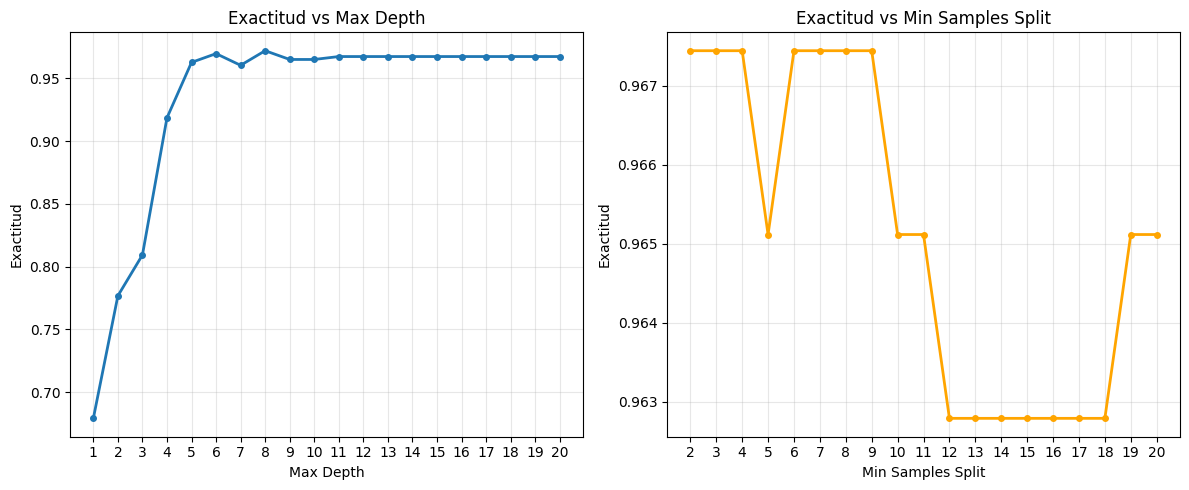

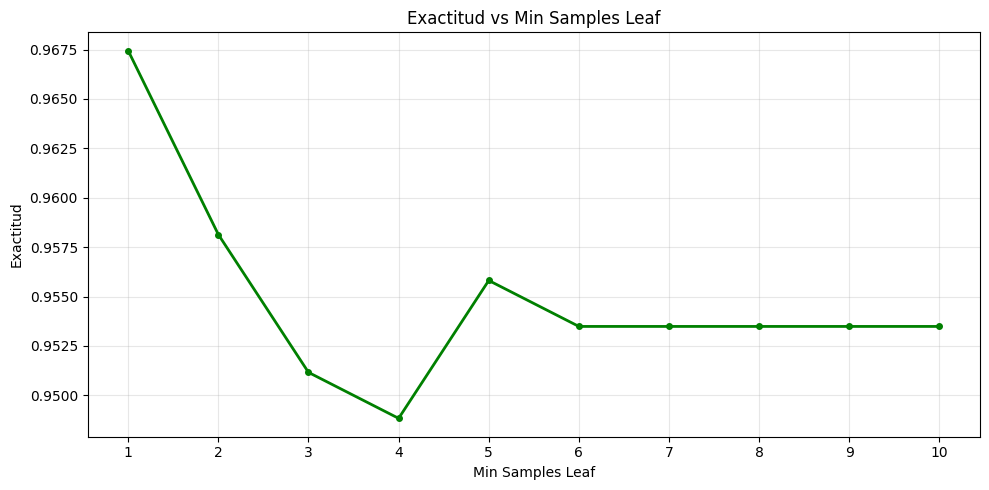

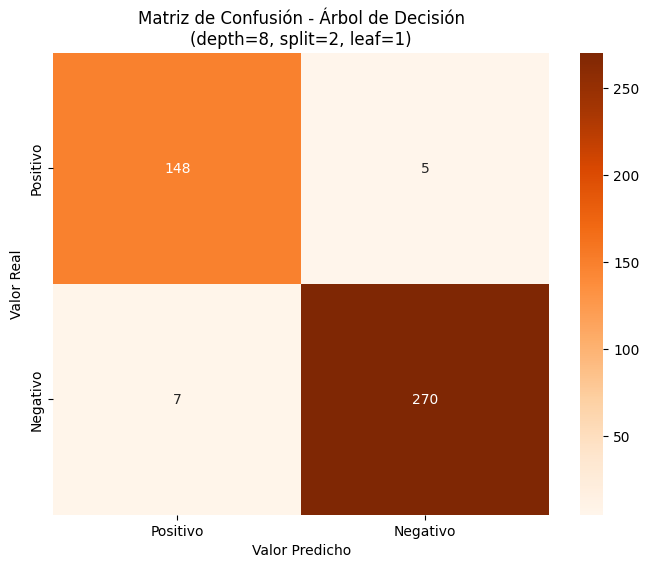


Reporte de clasificación final:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       277
           1       0.95      0.97      0.96       153

    accuracy                           0.97       430
   macro avg       0.97      0.97      0.97       430
weighted avg       0.97      0.97      0.97       430



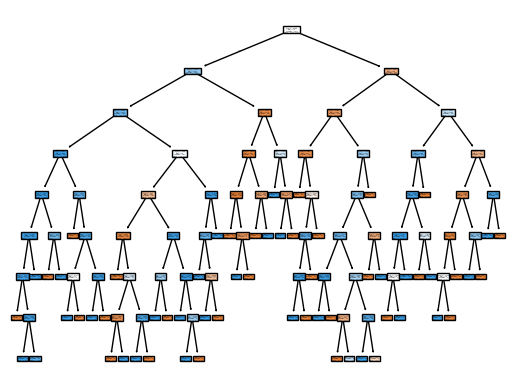

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Separación variable objetivo de los demás atributos
X = archivo.drop('Diagnosis', axis=1)
y = archivo['Diagnosis']

#Separar datos 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Balancear conjunto de entrenamiento
ros = RandomOverSampler(random_state=0)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

#Estandarizar data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

#Optimizar max_depth (profundidad del árbol)
depth_range = range(1, 21)
depth_scores = []

for depth in depth_range:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train_scaled, y_train_balanced)
    y_pred = tree.predict(X_test_scaled)
    depth_scores.append(accuracy_score(y_test, y_pred))

#Gráfico para max_depth
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(depth_range, depth_scores, marker='o', linewidth=2, markersize=4)
plt.title('Exactitud vs Max Depth', fontsize=12)
plt.xlabel('Max Depth')
plt.ylabel('Exactitud')
plt.grid(True, alpha=0.3)
plt.xticks(depth_range)

#Optimizar min_samples_split (Valor mínimo para separar un nodo interno)
split_range = range(2, 21)
split_scores = []

for split in split_range:
    tree = DecisionTreeClassifier(min_samples_split=split, random_state=42)
    tree.fit(X_train_scaled, y_train_balanced)
    y_pred = tree.predict(X_test_scaled)
    split_scores.append(accuracy_score(y_test, y_pred))

#Gráfico para min_samples_split
plt.subplot(1, 2, 2)
plt.plot(split_range, split_scores, marker='o', linewidth=2, markersize=4, color='orange')
plt.title('Exactitud vs Min Samples Split', fontsize=12)
plt.xlabel('Min Samples Split')
plt.ylabel('Exactitud')
plt.grid(True, alpha=0.3)
plt.xticks(split_range)
plt.tight_layout()
plt.show()

#Optimizar min_samples_leaf (Valor mínimo para ser un nodo hoja)
leaf_range = range(1, 11)
leaf_scores = []

for leaf in leaf_range:
    tree = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
    tree.fit(X_train_scaled, y_train_balanced)
    y_pred = tree.predict(X_test_scaled)
    leaf_scores.append(accuracy_score(y_test, y_pred))

#Gráfico para min_samples_leaf
plt.figure(figsize=(10, 5))
plt.plot(leaf_range, leaf_scores, marker='o', linewidth=2, markersize=4, color='green')
plt.title('Exactitud vs Min Samples Leaf', fontsize=12)
plt.xlabel('Min Samples Leaf')
plt.ylabel('Exactitud')
plt.grid(True, alpha=0.3)
plt.xticks(leaf_range)
plt.tight_layout()
plt.show()

#Mejor max_depth
best_depth_score = max(depth_scores)
best_depth = depth_range[depth_scores.index(best_depth_score)]
#Mejor min_samples_split
best_split_score = max(split_scores)
best_split = split_range[split_scores.index(best_split_score)]
#Mejor min_samples_leaf
best_leaf_score = max(leaf_scores)
best_leaf = leaf_range[leaf_scores.index(best_leaf_score)]

#Modelo a entrenar
final_tree = DecisionTreeClassifier(
    max_depth=best_depth,
    min_samples_split=best_split,
    min_samples_leaf=best_leaf,
    random_state=42
)
final_tree.fit(X_train_scaled, y_train_balanced)
final_y_pred = final_tree.predict(X_test_scaled)

#Métricas del modelo
final_accuracy_TREE = accuracy_score(y_test, final_y_pred)
precision_TREE = precision_score(y_test, y_pred)
recall_TREE = recall_score(y_test, y_pred)
f1_tree = f1_score(y_test, y_pred)
tn_tree, fp_tree, fn_tree, tp_tree = final_conf_matrix.ravel()

final_conf_matrix = confusion_matrix(y_test, final_y_pred, labels=[1, 0])
plt.figure(figsize=(8, 6))
sns.heatmap(final_conf_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Positivo', 'Negativo'],
            yticklabels=['Positivo', 'Negativo'])
plt.title(f'Matriz de Confusión - Árbol de Decisión\n(depth={best_depth}, split={best_split}, leaf={best_leaf})')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

#Reporte
print("\nReporte de clasificación final:")
print(classification_report(y_test, final_y_pred, zero_division=0))

plot_tree(final_tree,filled=True)
plt.show()

### Modelo de Random Forest.

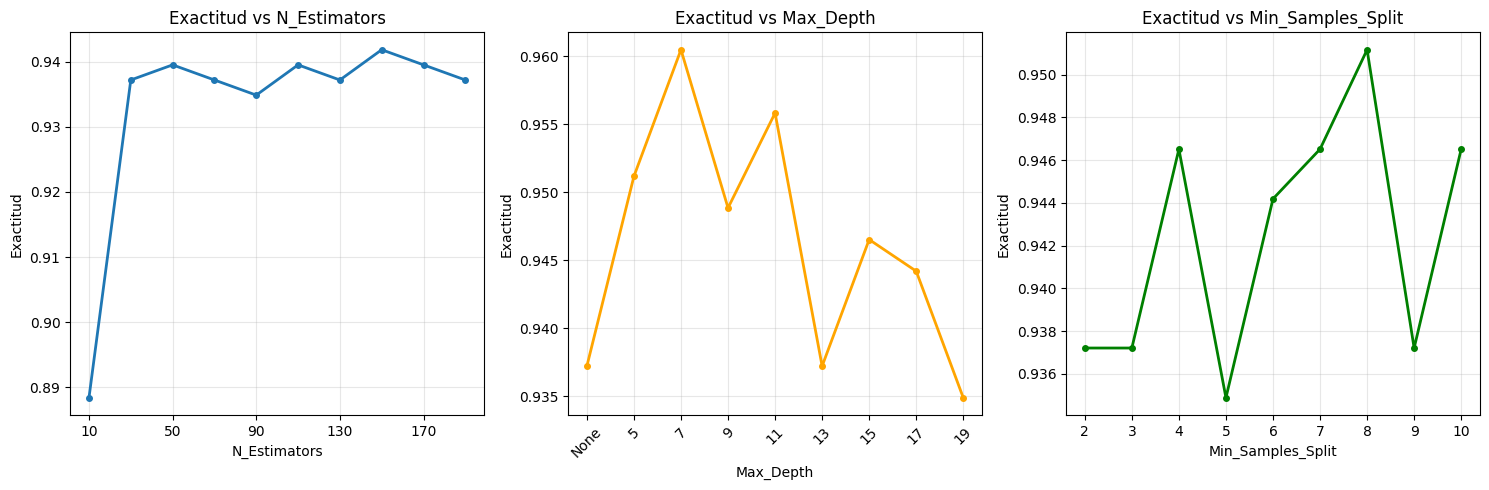


Exactitud del modelo final: 0.9535


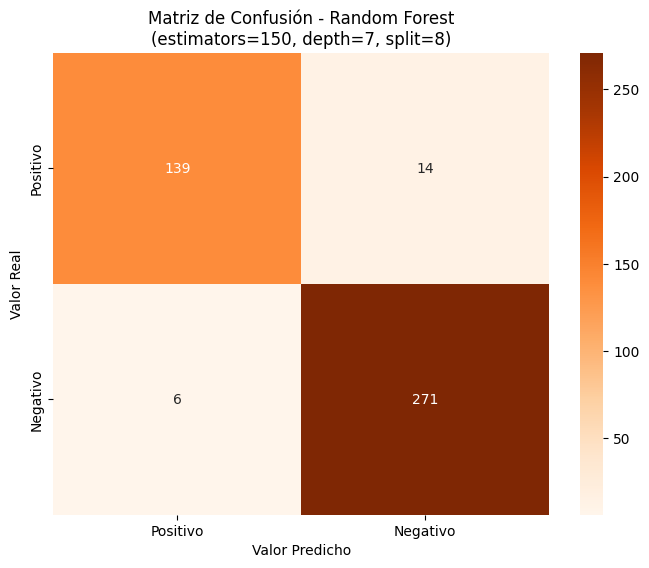


Reporte de clasificación final:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.96      0.91      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Separación variable objetivo de los demás atributos
X = archivo.drop('Diagnosis', axis=1)
y = archivo['Diagnosis']

#Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Balancear conjunto de entrenamiento
ros = RandomOverSampler(random_state=0)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

#Estandarizar data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

#Optimizar n_estimators
range_estimators = range(10, 201, 20)
score_estimators = []

for estimator in range_estimators:
    forest = RandomForestClassifier(n_estimators=estimator, random_state=42)
    forest.fit(X_train_scaled, y_train_balanced) 
    y_pred = forest.predict(X_test_scaled)        
    score_estimators.append(accuracy_score(y_test, y_pred))

#Optimizar max_depth
depth_range = [None] + list(range(5, 21, 2))
depth_scores = []

for depth in depth_range:
    forest = RandomForestClassifier(max_depth=depth, random_state=42)
    forest.fit(X_train_scaled, y_train_balanced)
    y_pred = forest.predict(X_test_scaled)
    depth_scores.append(accuracy_score(y_test, y_pred))

#Optimizar min_samples_split
split_range = range(2, 11)
split_scores = []

for split in split_range:
    forest = RandomForestClassifier(min_samples_split=split, random_state=42)
    forest.fit(X_train_scaled, y_train_balanced)
    y_pred = forest.predict(X_test_scaled)
    split_scores.append(accuracy_score(y_test, y_pred))


plt.figure(figsize=(15, 5))
#Gráfico n_estimators
plt.subplot(1, 3, 1)
plt.plot(range_estimators, score_estimators, marker='o', linewidth=2, markersize=4)
plt.title('Exactitud vs N_Estimators', fontsize=12)
plt.xlabel('N_Estimators')
plt.ylabel('Exactitud')
plt.grid(True, alpha=0.3)
plt.xticks(range(10, 201, 40))

#Gráfico max_depth
plt.subplot(1, 3, 2)
depth_labels = ['None'] + [str(d) for d in depth_range[1:]]
plt.plot(range(len(depth_range)), depth_scores, marker='o', linewidth=2, markersize=4, color='orange')
plt.title('Exactitud vs Max_Depth', fontsize=12)
plt.xlabel('Max_Depth')
plt.ylabel('Exactitud')
plt.grid(True, alpha=0.3)
plt.xticks(range(len(depth_range)), depth_labels, rotation=45)

#Gráfico min_samples_split
plt.subplot(1, 3, 3)
plt.plot(split_range, split_scores, marker='o', linewidth=2, markersize=4, color='green')
plt.title('Exactitud vs Min_Samples_Split', fontsize=12)
plt.xlabel('Min_Samples_Split')
plt.ylabel('Exactitud')
plt.grid(True, alpha=0.3)
plt.xticks(split_range)
plt.tight_layout()
plt.show()

#Mejor n_estimators
best_estimator_score = max(score_estimators)
best_estimator = list(range_estimators)[score_estimators.index(best_estimator_score)]
#Mejor max_depth
best_depth_score = max(depth_scores)
best_depth = depth_range[depth_scores.index(best_depth_score)]
#Mejor min_samples_split
best_split_score = max(split_scores)
best_split = split_range[split_scores.index(best_split_score)]

final_forest = RandomForestClassifier(
    n_estimators=best_estimator,
    max_depth=best_depth,
    min_samples_split=best_split,
    random_state=42
)

final_forest.fit(X_train_scaled, y_train_balanced)
final_y_pred = final_forest.predict(X_test_scaled)

#Métricas del modelo final
final_accuracy_RF = accuracy_score(y_test, final_y_pred)
print(f"\nExactitud del modelo final: {final_accuracy_RF:.4f}")

#Matriz de confusión
final_conf_matrix = confusion_matrix(y_test, final_y_pred, labels=[1, 0])

plt.figure(figsize=(8, 6))
sns.heatmap(final_conf_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Positivo', 'Negativo'],
            yticklabels=['Positivo', 'Negativo'])
plt.title(f'Matriz de Confusión - Random Forest\n(estimators={best_estimator}, depth={best_depth}, split={best_split})')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

#Reporte
print("\nReporte de clasificación final:")
print(classification_report(y_test, final_y_pred, zero_division=0))

precision_RF = precision_score(y_test, y_pred)
recall_RF = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
tn_rf, fp_rf, fn_rf, tp_rf = final_conf_matrix.ravel()

### Curvas ROC de los modelos.

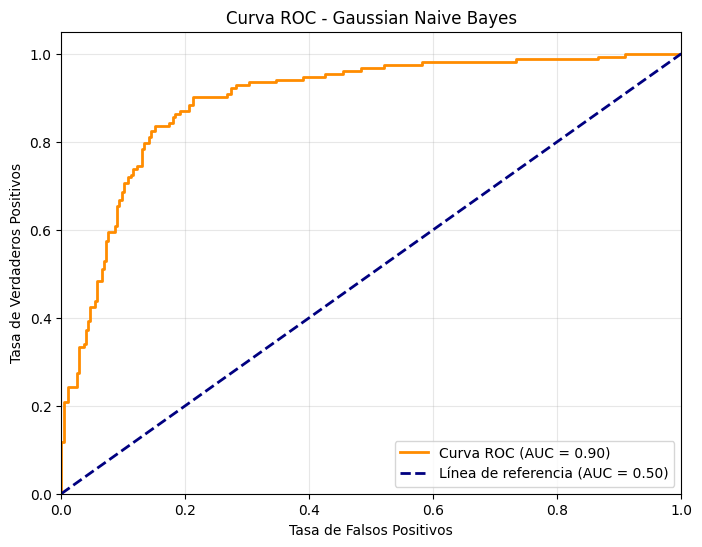

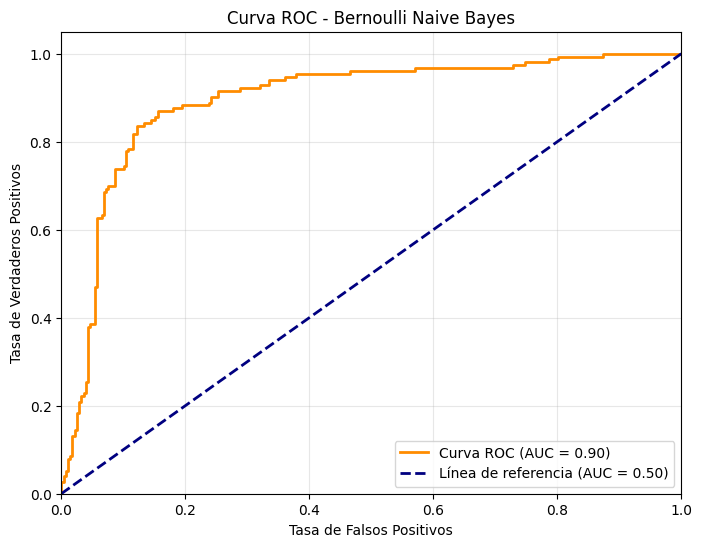

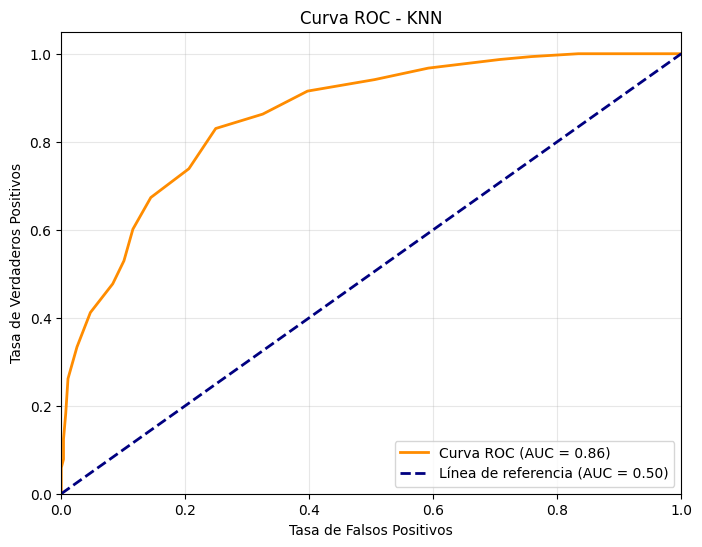

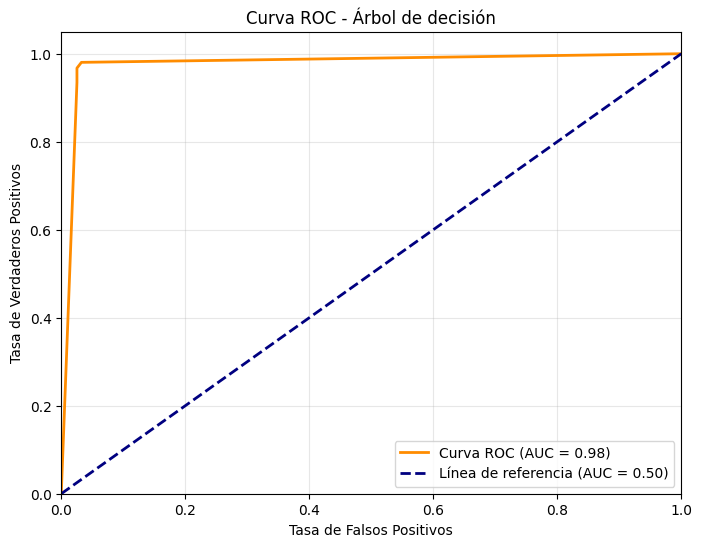

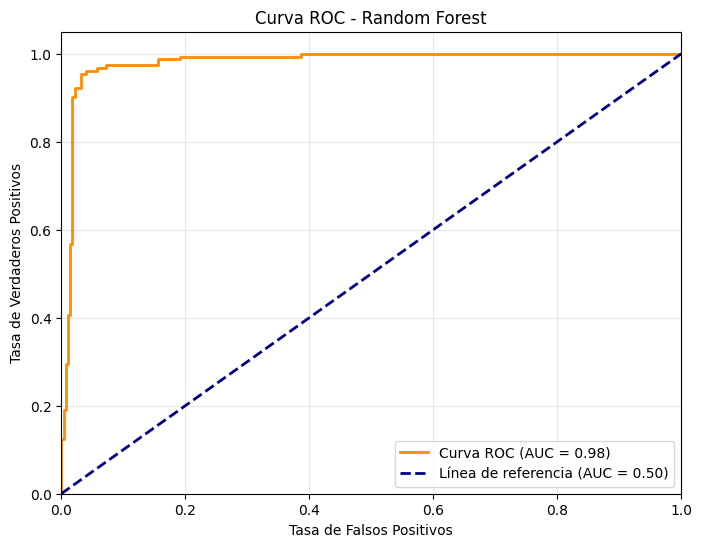

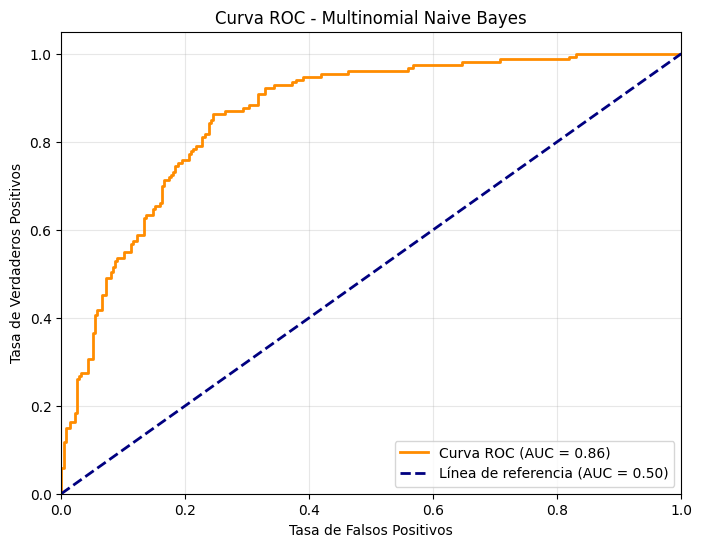

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

#Crear la gráfica de la curva ROC de Gaussian Naive Bayes 
y_pred_proba = nb_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score_NB = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_score_NB:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea de referencia (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

#Crear la gráfica de la curva ROC de Bernoulli Naive Bayes
y_pred_proba = Bernoulli_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score_BBN = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_score_BBN:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea de referencia (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Bernoulli Naive Bayes')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

#Crear la gráfica de la curva ROC de KNN
y_pred_proba = final_knn_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score_KNN = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_score_KNN:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea de referencia (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - KNN')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

#Crear la gráfica de la curva ROC de Árbol de decisión
y_pred_proba = final_tree.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score_TREE= roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_score_TREE:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea de referencia (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Árbol de decisión')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

#Crear la gráfica de la curva ROC de Random Forest
y_pred_proba = final_forest.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score_RF = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_score_RF:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea de referencia (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

#Crear la gráfica de la curva ROC de Multinomial Naive Bayes
y_pred_proba = multinomial_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score_multinomial = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_score_multinomial:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea de referencia (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Multinomial Naive Bayes')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


### Resumen de los valores importantes de los modelos.

In [11]:
Naive_Bayes_dict = {
    'Accuracy': accuracy_NB,
    'Precision': precision_NB,
    'Recall': recall_NB,
    'F1-Score': f1_nb,
    'True Positives': tp_nb,
    'True Negatives': tn_nb,
    'False Positives': fp_nb,
    'False Negatives': fn_nb,
    'AUC-score': auc_score_NB
}
Naive_Bayes_dict2 = {
    'Accuracy': accuracy_BNB,
    'Precision': precision_BNB,
    'Recall': recall_BNB,
    'F1-Score': f1_bnb,
    'True Positives': tp_bnb,
    'True Negatives': tn_bnb,
    'False Positives': fp_bnb,
    'False Negatives': fn_bnb,
    'AUC-score': auc_score_BBN
}

KNN = {
    'Accuracy': final_accuracy_KNN,
    'Precision': precision_KNN,
    'Recall': recall_KNN,
    'F1-Score': f1_knn,
    'True Positives': tp_knn,
    'True Negatives': tn_knn,
    'False Positives': fp_knn,
    'False Negatives': fn_knn,
    'AUC-score': auc_score_KNN
}
TREE = {
    'Accuracy': final_accuracy_TREE,
    'Precision': precision_TREE,
    'Recall': recall_TREE,
    'F1-Score': f1_tree,
    'True Positives': tp_tree,
    'True Negatives': tn_tree,
    'False Positives': fp_tree,
    'False Negatives': fn_tree,
    'AUC-score': auc_score_TREE,
}
RF = {
    'Accuracy': final_accuracy_RF,
    'Precision': precision_RF,
    'Recall': recall_RF,
    'F1-Score': f1_rf,
    'True Positives': tp_rf,
    'True Negatives': tn_rf,
    'False Positives': fp_rf,
    'False Negatives': fn_rf,
    'AUC-score': auc_score_RF
}
Multinomial = {
    'Accuracy': accuracy_multinomial,
    'Precision': precision_multinomial,
    'Recall': recall_multinomial,
    'F1-Score': f1_multinomial,
    'True Positives': tp_multinomial,
    'True Negatives': tn_multinomial,
    'False Positives': fp_multinomial,
    'False Negatives': fn_multinomial,
    'AUC-score': auc_score_multinomial
}

resume = pd.DataFrame({
    'Gaussian Naive Bayes': pd.Series(Naive_Bayes_dict),
    'Bernoulli Naive Bayes': pd.Series(Naive_Bayes_dict2),
    'Multinomial Naive Bayes': pd.Series(Multinomial),
    'KNN': pd.Series(KNN),
    'Decision Tree': pd.Series(TREE),
    'Random Forest': pd.Series(RF)
})

resume.T

,Accuracy,Precision,Recall,F1-Score,True Positives,True Negatives,False Positives,False Negatives,AUC-score
Gaussian Naive Bayes,0.839535,0.750000,0.823529,0.785047,235.0,126.0,27.0,42.0,0.895000
Bernoulli Naive Bayes,0.853488,0.764706,0.849673,0.804954,237.0,130.0,23.0,40.0,0.895189
Multinomial Naive Bayes,0.748837,0.655172,0.620915,0.637584,227.0,95.0,58.0,50.0,0.863075
KNN,0.790698,0.655172,0.620915,0.637584,237.0,103.0,50.0,40.0,0.859064
Decision Tree,0.972093,0.923567,0.947712,0.935484,237.0,103.0,50.0,40.0,0.976865
Random Forest,0.953488,0.951389,0.895425,0.922559,271.0,139.0,14.0,6.0,0.981029


### Gráficos por métrica.

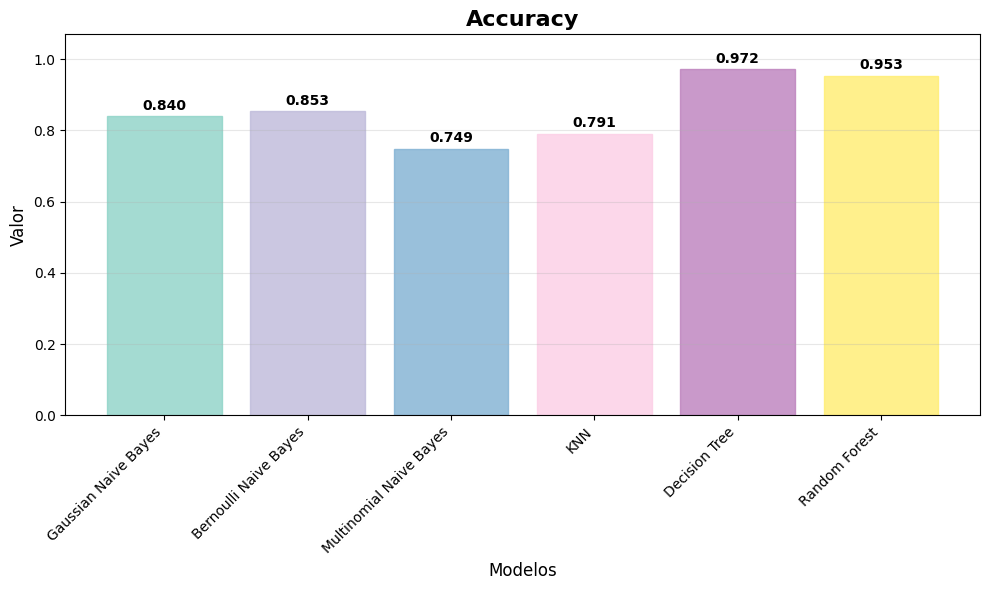

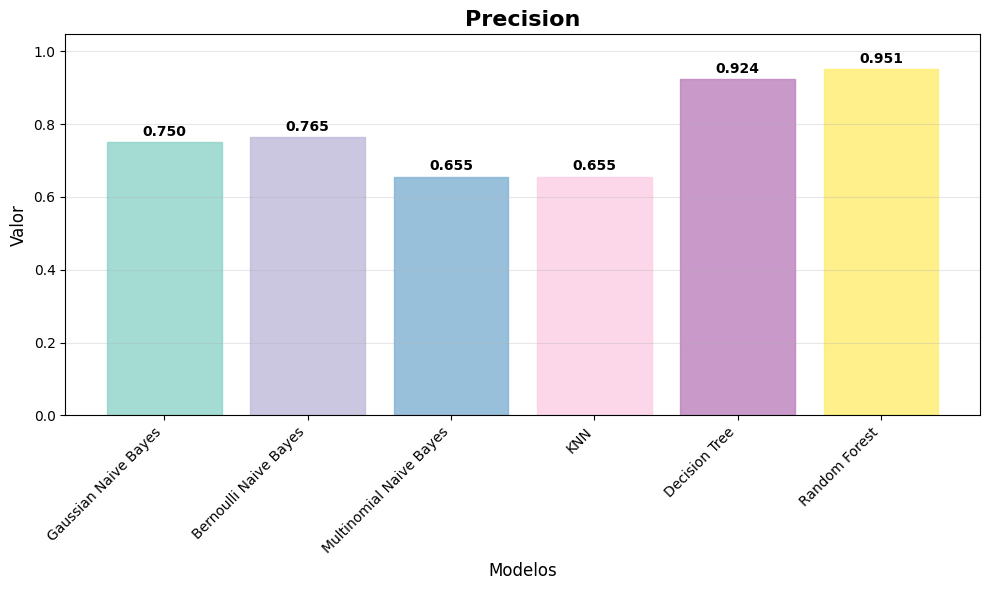

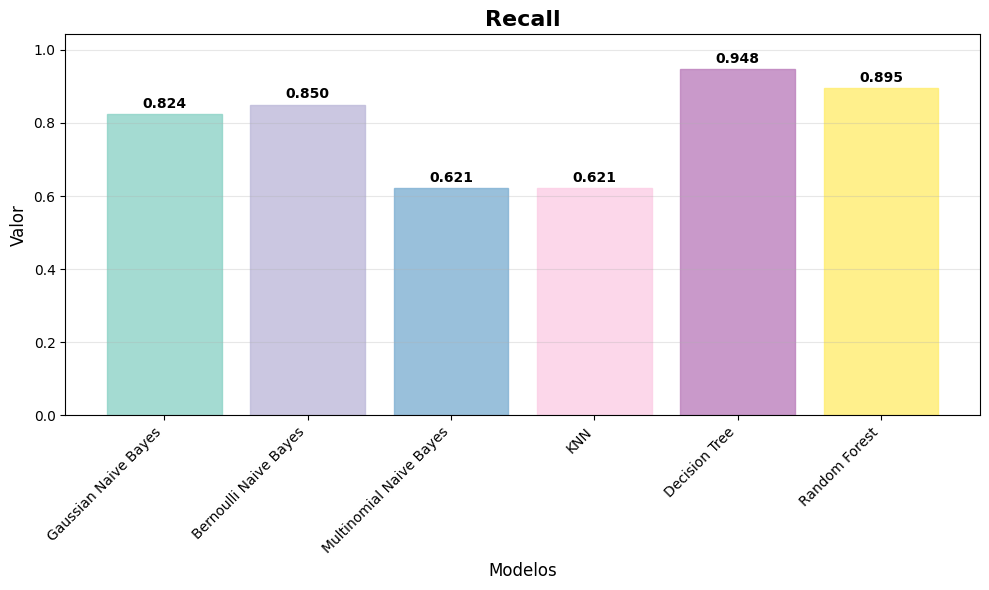

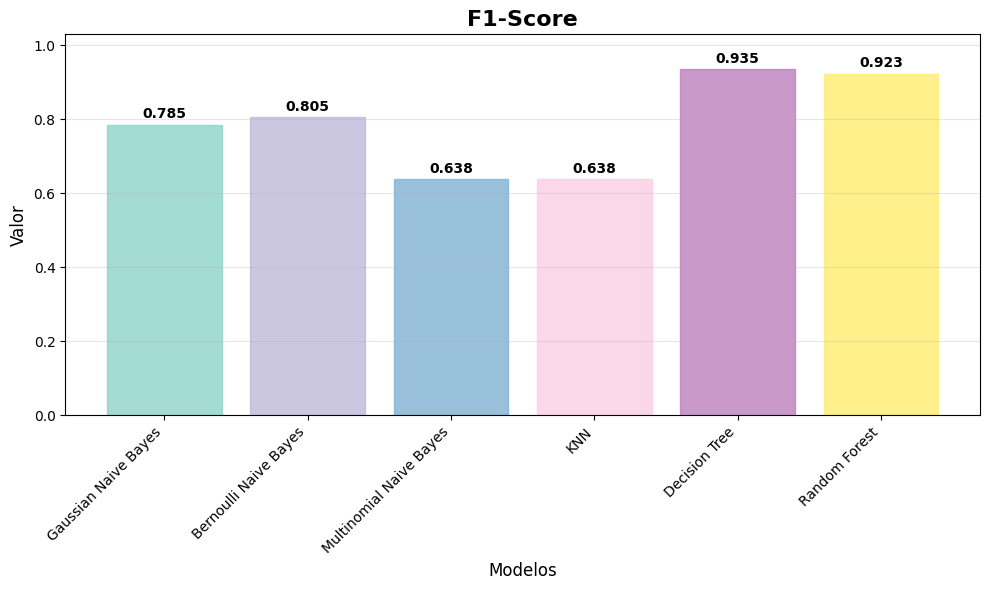

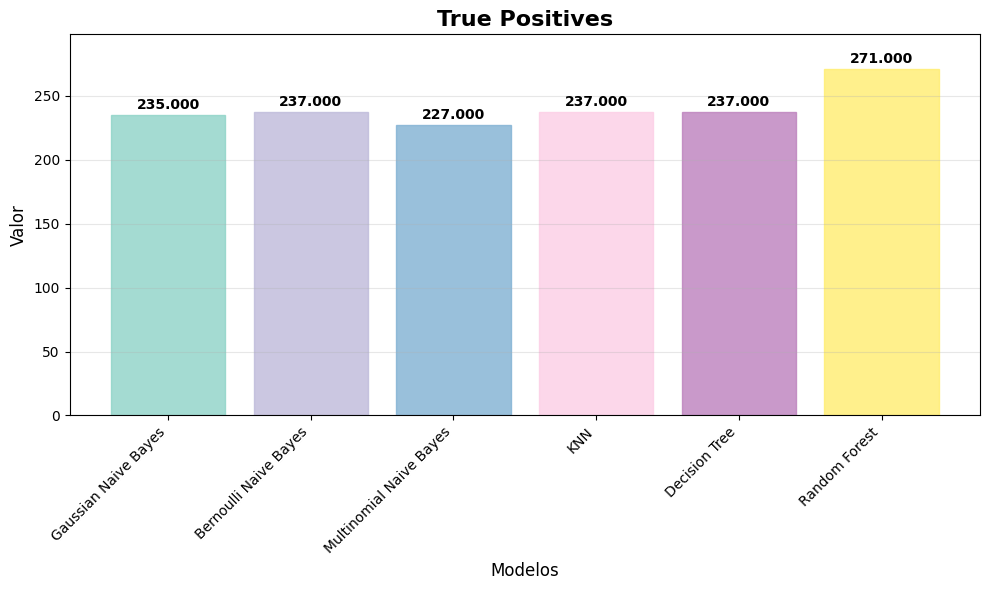

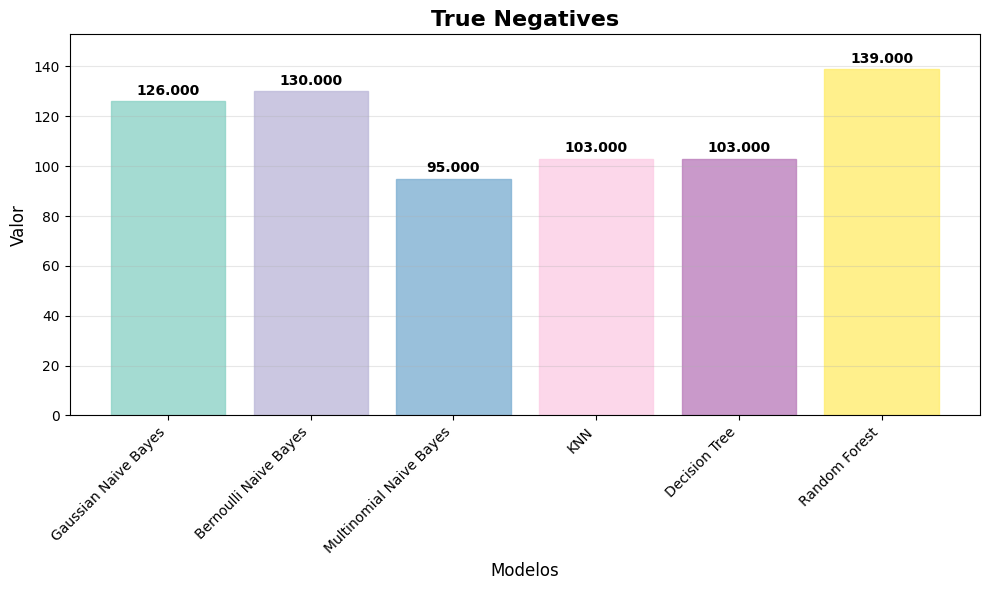

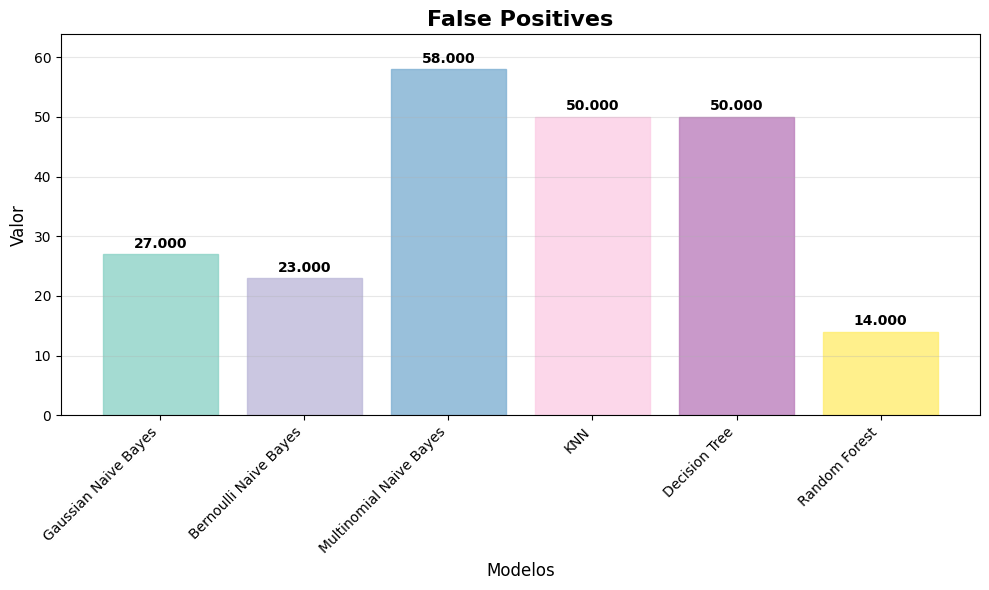

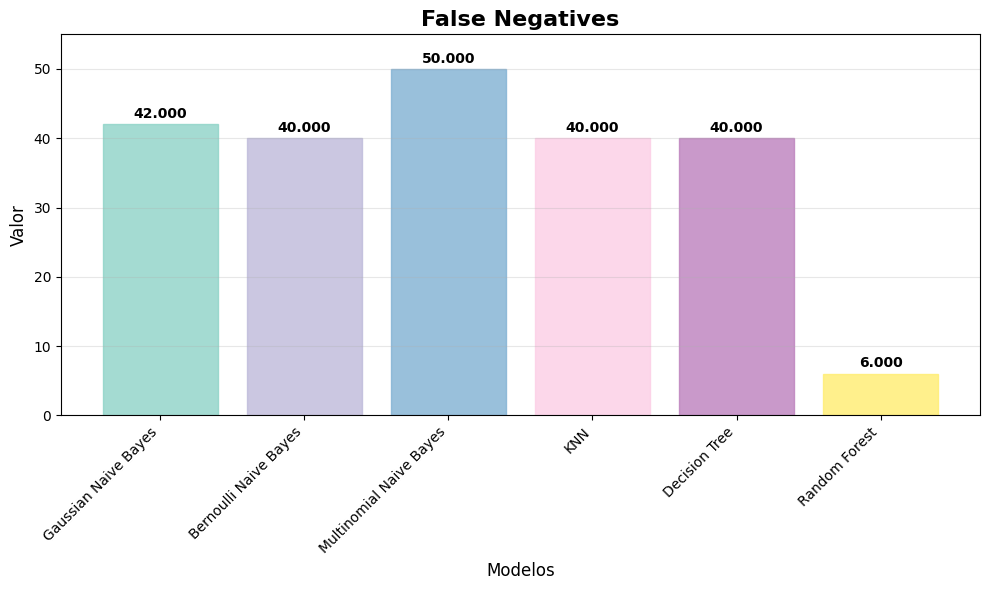

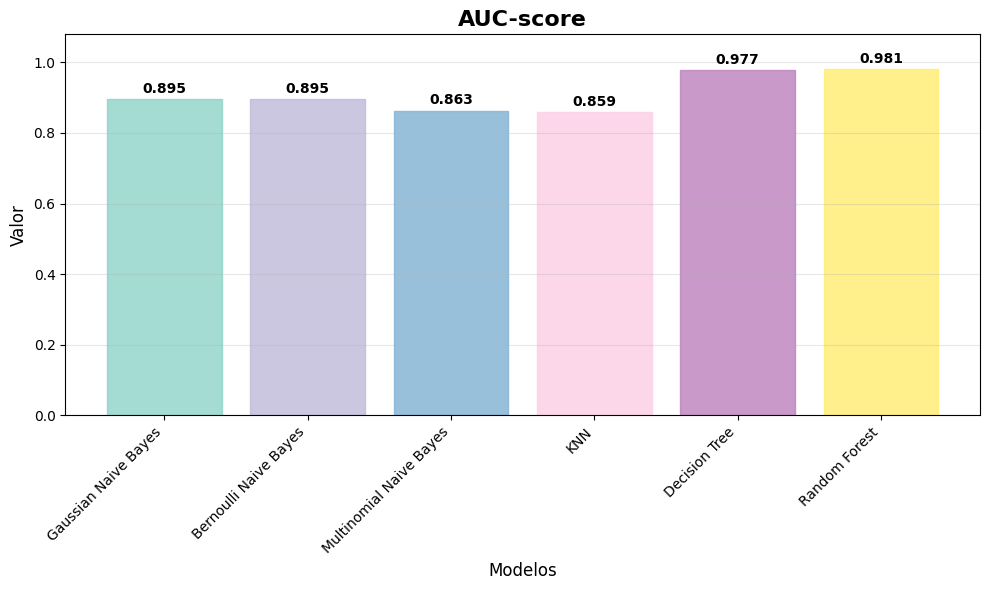

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_grouped_metrics(df):
    """Crear un gráfico de barras separado para cada métrica"""
    metrics = df.index.tolist()
    
    for i, metric in enumerate(metrics):
        #Crear una nueva figura para cada métrica
        plt.figure(figsize=(10, 6))
        
        #Datos para la métrica actual
        values = df.loc[metric].values
        models = df.columns.tolist()
        
        bars = plt.bar(models, values, alpha=0.8)
        
        colors = plt.cm.Set3(np.linspace(0, 1, len(models)))
        for bar, color in zip(bars, colors):
            bar.set_color(color)

        for j, (model, value) in enumerate(zip(models, values)):
            if pd.notna(value):  # Solo si el valor no es NaN
                plt.text(j, value + max(values)*0.01, f'{value:.3f}',
                        ha='center', va='bottom', fontweight='bold')
        
        plt.title(f'{metric}', fontweight='bold', fontsize=16)
        plt.ylabel('Valor', fontsize=12)
        plt.xlabel('Modelos', fontsize=12)
        plt.ylim(0, max(values) * 1.1 if max(values) > 0 else 1)
        
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()

plot_grouped_metrics(resume)

### Iteración con semillas distintas.

### Modelo de Naive Bayes.

Ejecutando evaluaciones con diferentes random states...
Iteración 1/10
Reporte de clasificación - Iteración 1:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       277
           1       0.64      0.77      0.70       153

    accuracy                           0.77       430
   macro avg       0.75      0.77      0.76       430
weighted avg       0.78      0.77      0.77       430

--------------------------------------------------
Iteración 2/10
Reporte de clasificación - Iteración 2:
              precision    recall  f1-score   support

           0       0.92      0.77      0.83       298
           1       0.61      0.84      0.71       132

    accuracy                           0.79       430
   macro avg       0.76      0.80      0.77       430
weighted avg       0.82      0.79      0.80       430

--------------------------------------------------
Iteración 3/10
Reporte de clasificación - Iteración 3:
              precision

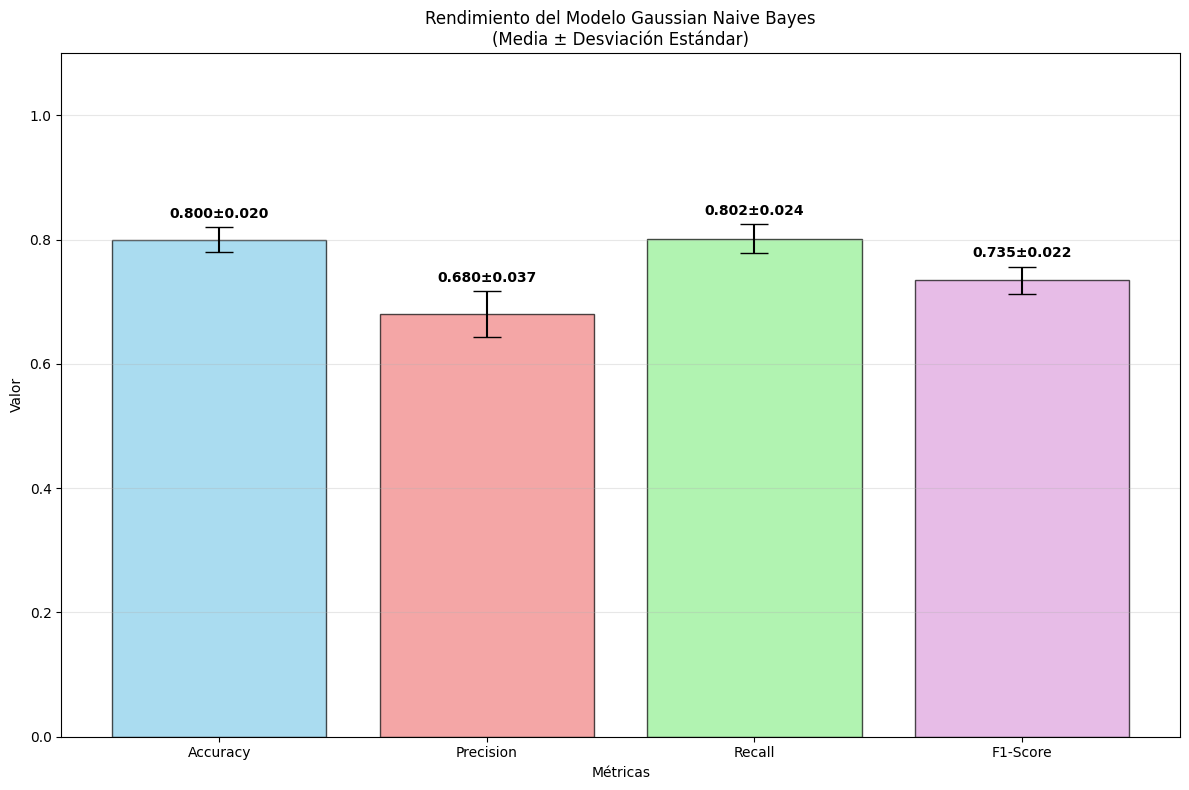

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Separación variable objetivo de los demás atributos
X = archivo.drop('Diagnosis', axis=1)
y = archivo['Diagnosis']

#Inicializar listas para almacenar métricas
accuracy_list_NB = []
precision_list_NB = []
recall_list_NB = []
f1_list_NB = []
tn_list_NB = []
fp_list_NB = []
fn_list_NB = []
tp_list_NB = []

print("Ejecutando evaluaciones con diferentes random states...")

for i in range(1, 11):
    print(f"Iteración {i}/10")
    
    #División de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    #Balancear el conjunto de entrenamiento
    ros = RandomOverSampler(random_state=i)
    X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)
    
    #Escalar datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_balanced)
    X_test_scaled = scaler.transform(X_test)
    
    #Entrenamiento del modelo
    nb_model = GaussianNB()
    nb_model.fit(X_train_scaled, y_train_balanced)
    y_pred = nb_model.predict(X_test_scaled)
    
    #Calcular métricas
    accuracy_NB = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
    precision_NB = precision_score(y_test, y_pred)
    recall_NB = recall_score(y_test, y_pred)
    f1_nb = f1_score(y_test, y_pred)
    tn_nb, fp_nb, fn_nb, tp_nb = conf_matrix.ravel()
    
    #Agregar valores a las listas
    accuracy_list_NB.append(accuracy_NB)
    precision_list_NB.append(precision_NB)
    recall_list_NB.append(recall_NB)
    f1_list_NB.append(f1_nb)
    tn_list_NB.append(tn_nb)
    fp_list_NB.append(fp_nb)
    fn_list_NB.append(fn_nb)
    tp_list_NB.append(tp_nb)
    
    #Reporte de clasificación
    class_report = classification_report(y_test, y_pred)
    print(f"Reporte de clasificación - Iteración {i}:")
    print(class_report)
    print("-" * 50)

metrics_data = {
    'Accuracy': accuracy_list_NB,
    'Precision': precision_list_NB,
    'Recall': recall_list_NB,
    'F1-Score': f1_list_NB
}

for metric_name, metric_values in metrics_data.items():
    mean_val = np.mean(metric_values)
    std_val = np.std(metric_values)
    min_val = np.min(metric_values)
    max_val = np.max(metric_values)
    
    print(f"\n{metric_name}:")
    print(f"  Media: {mean_val:.4f}")
    print(f"  Desviación Estándar: {std_val:.4f}")
    print(f"  Mínimo: {min_val:.4f}")
    print(f"  Máximo: {max_val:.4f}")
    print(f"  Valores: {[round(x, 4) for x in metric_values]}")

#Mostrar estadísticas de la matriz de confusión
print(f"\nMatriz de Confusión (promedios):")
print(f"  TP (Verdaderos Positivos): {np.mean(tp_list_NB):.2f} ± {np.std(tp_list_NB):.2f}")
print(f"  TN (Verdaderos Negativos): {np.mean(tn_list_NB):.2f} ± {np.std(tn_list_NB):.2f}")
print(f"  FP (Falsos Positivos): {np.mean(fp_list_NB):.2f} ± {np.std(fp_list_NB):.2f}")
print(f"  FN (Falsos Negativos): {np.mean(fn_list_NB):.2f} ± {np.std(fn_list_NB):.2f}")

#Gráfico de las métricas
plt.figure(figsize=(12, 8))
x_pos = np.arange(len(metrics_data))
means = [np.mean(values) for values in metrics_data.values()]
stds = [np.std(values) for values in metrics_data.values()]

bars = plt.bar(x_pos, means, yerr=stds, capsize=10, alpha=0.7, 
               color=['skyblue', 'lightcoral', 'lightgreen', 'plum'],
               edgecolor='black', linewidth=1)

#Añadir valores en las barras
for i, (bar, mean, std) in enumerate(zip(bars, means, stds)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + std + 0.01,
             f'{mean:.3f}±{std:.3f}',
             ha='center', va='bottom', fontweight='bold')

plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Rendimiento del Modelo Gaussian Naive Bayes\n(Media ± Desviación Estándar)')
plt.xticks(x_pos, metrics_data.keys())
plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### Modelo de Árboles de decisión.

Ejecutando evaluaciones Decision Tree con diferentes random states...
Iteración 1/10


  Accuracy: 0.9372
  Precision: 0.9200
  Recall: 0.9020
  F1-Score: 0.9109
----------------------------------------
Iteración 2/10
  Accuracy: 0.9372
  Precision: 0.8832
  Recall: 0.9167
  F1-Score: 0.8996
----------------------------------------
Iteración 3/10
  Accuracy: 0.9372
  Precision: 0.8765
  Recall: 0.9530
  F1-Score: 0.9132
----------------------------------------
Iteración 4/10
  Accuracy: 0.9605
  Precision: 0.9304
  Recall: 0.9608
  F1-Score: 0.9453
----------------------------------------
Iteración 5/10
  Accuracy: 0.9395
  Precision: 0.8947
  Recall: 0.9315
  F1-Score: 0.9128
----------------------------------------
Iteración 6/10
  Accuracy: 0.9512
  Precision: 0.9384
  Recall: 0.9195
  F1-Score: 0.9288
----------------------------------------
Iteración 7/10
  Accuracy: 0.9558
  Precision: 0.9388
  Recall: 0.9324
  F1-Score: 0.9356
----------------------------------------
Iteración 8/10
  Accuracy: 0.9512
  Precision: 0.9329
  Recall: 0.9267
  F1-Score: 0.9298
--------

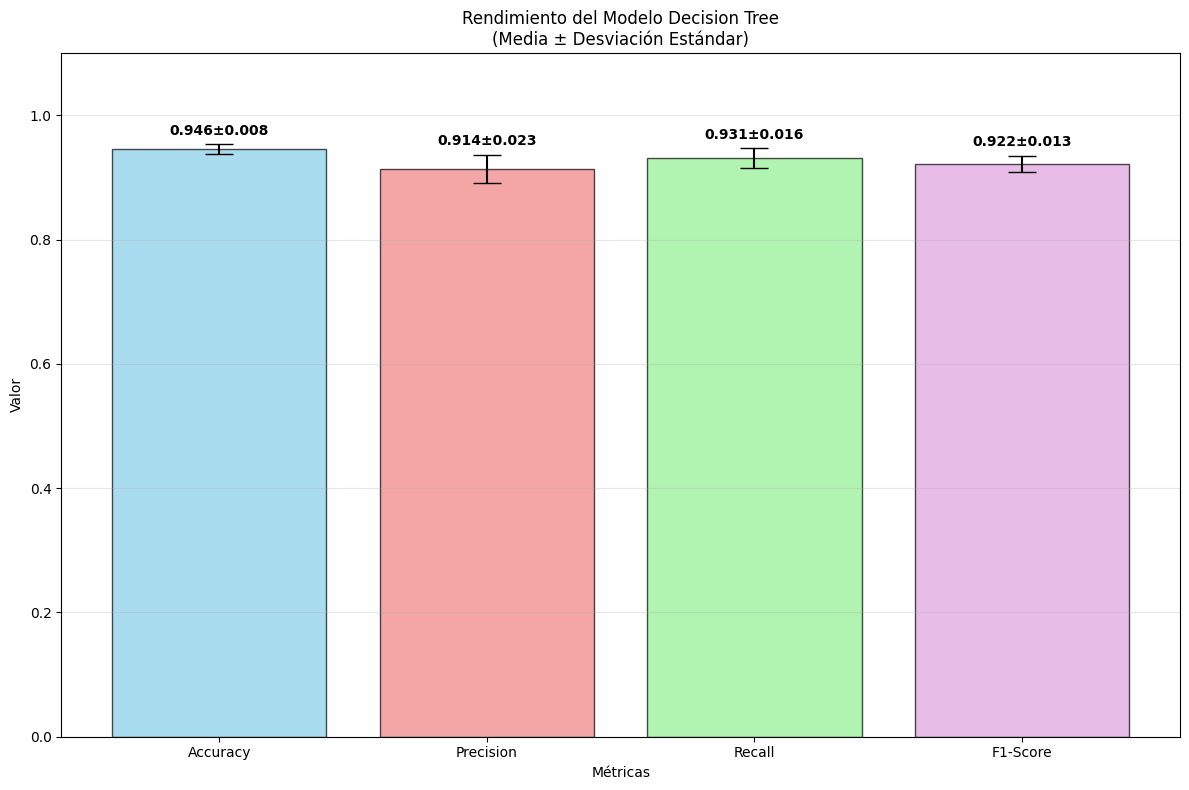

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Separación variable objetivo de los demás atributos
X = archivo.drop('Diagnosis', axis=1)
y = archivo['Diagnosis']

#Inicializar listas para almacenar métricas
accuracy_list_tree = []
precision_list_tree = []
recall_list_tree = []
f1_list_tree = []
tn_list_tree = []
fp_list_tree = []
fn_list_tree = []
tp_list_tree = []

print("Ejecutando evaluaciones Decision Tree con diferentes random states...")

for i in range(1, 11):
    print(f"Iteración {i}/10")
    
    #Separar datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    #Balancear conjunto de entrenamiento
    ros = RandomOverSampler(random_state=i)
    X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)
    
    #Estandarizar data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_balanced)
    X_test_scaled = scaler.transform(X_test)
    
    #Modelo
    tree_model = DecisionTreeClassifier(max_depth=8, min_samples_split=2, min_samples_leaf=1, random_state=i)
    tree_model.fit(X_train_scaled, y_train_balanced)  
    y_pred = tree_model.predict(X_test_scaled)        
    
    #Calcular métricas
    accuracy_tree = accuracy_score(y_test, y_pred)
    precision_tree = precision_score(y_test, y_pred)
    recall_tree = recall_score(y_test, y_pred)
    f1_tree = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
    tn_tree, fp_tree, fn_tree, tp_tree = conf_matrix.ravel()
    
    #Agregar valores a las listas
    accuracy_list_tree.append(accuracy_tree)
    precision_list_tree.append(precision_tree)
    recall_list_tree.append(recall_tree)            
    f1_list_tree.append(f1_tree)
    tn_list_tree.append(tn_tree)
    fp_list_tree.append(fp_tree)
    fn_list_tree.append(fn_tree)
    tp_list_tree.append(tp_tree)
    
    #Mostrar métricas de esta iteración
    print(f"  Accuracy: {accuracy_tree:.4f}")
    print(f"  Precision: {precision_tree:.4f}")
    print(f"  Recall: {recall_tree:.4f}")
    print(f"  F1-Score: {f1_tree:.4f}")
    print("-" * 40)

print("¡Evaluaciones completadas!")

#Estadísticas finales
print("\n" + "="*60)
print("ESTADÍSTICAS DE LAS MÉTRICAS - DECISION TREE")
print("="*60)

metrics_data = {
    'Accuracy': accuracy_list_tree,
    'Precision': precision_list_tree,
    'Recall': recall_list_tree,
    'F1-Score': f1_list_tree
}

for metric_name, metric_values in metrics_data.items():
    mean_val = np.mean(metric_values)
    std_val = np.std(metric_values)
    min_val = np.min(metric_values)
    max_val = np.max(metric_values)
    
    print(f"\n{metric_name}:")
    print(f"  Media: {mean_val:.4f}")
    print(f"  Desviación Estándar: {std_val:.4f}")
    print(f"  Mínimo: {min_val:.4f}")
    print(f"  Máximo: {max_val:.4f}")
    print(f"  Valores: {[round(x, 4) for x in metric_values]}")

#Mostrar estadísticas de la matriz de confusión
print(f"\nMatriz de Confusión (promedios):")
print(f"  TP (Verdaderos Positivos): {np.mean(tp_list_tree):.2f} ± {np.std(tp_list_tree):.2f}")
print(f"  TN (Verdaderos Negativos): {np.mean(tn_list_tree):.2f} ± {np.std(tn_list_tree):.2f}")
print(f"  FP (Falsos Positivos): {np.mean(fp_list_tree):.2f} ± {np.std(fp_list_tree):.2f}")
print(f"  FN (Falsos Negativos): {np.mean(fn_list_tree):.2f} ± {np.std(fn_list_tree):.2f}")

#Gráfico de las métricas
plt.figure(figsize=(12, 8))
x_pos = np.arange(len(metrics_data))
means = [np.mean(values) for values in metrics_data.values()]
stds = [np.std(values) for values in metrics_data.values()]

bars = plt.bar(x_pos, means, yerr=stds, capsize=10, alpha=0.7,
               color=['skyblue', 'lightcoral', 'lightgreen', 'plum'],
               edgecolor='black', linewidth=1)

#Añadir valores en las barras
for i, (bar, mean, std) in enumerate(zip(bars, means, stds)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + std + 0.01,
             f'{mean:.3f}±{std:.3f}',
             ha='center', va='bottom', fontweight='bold')

plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Rendimiento del Modelo Decision Tree\n(Media ± Desviación Estándar)') 
plt.xticks(x_pos, metrics_data.keys())
plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### Modelo de KNN.

Iteración 1/10
  Accuracy: 0.7465
  Precision: 0.6528
  Recall: 0.6144
  F1-Score: 0.6330
Iteración 2/10
  Accuracy: 0.7907
  Precision: 0.6567
  Recall: 0.6667
  F1-Score: 0.6617
Iteración 3/10
  Accuracy: 0.7651
  Precision: 0.6463
  Recall: 0.7114
  F1-Score: 0.6773
Iteración 4/10
  Accuracy: 0.7860
  Precision: 0.6743
  Recall: 0.7712
  F1-Score: 0.7195
Iteración 5/10
  Accuracy: 0.7651
  Precision: 0.6531
  Recall: 0.6575
  F1-Score: 0.6553
Iteración 6/10
  Accuracy: 0.7674
  Precision: 0.6644
  Recall: 0.6644
  F1-Score: 0.6644
Iteración 7/10
  Accuracy: 0.7791
  Precision: 0.6779
  Recall: 0.6824
  F1-Score: 0.6801
Iteración 8/10
  Accuracy: 0.7837
  Precision: 0.7050
  Recall: 0.6533
  F1-Score: 0.6782
Iteración 9/10
  Accuracy: 0.7767
  Precision: 0.6774
  Recall: 0.6954
  F1-Score: 0.6863
Iteración 10/10
  Accuracy: 0.7767
  Precision: 0.6928
  Recall: 0.6839
  F1-Score: 0.6883


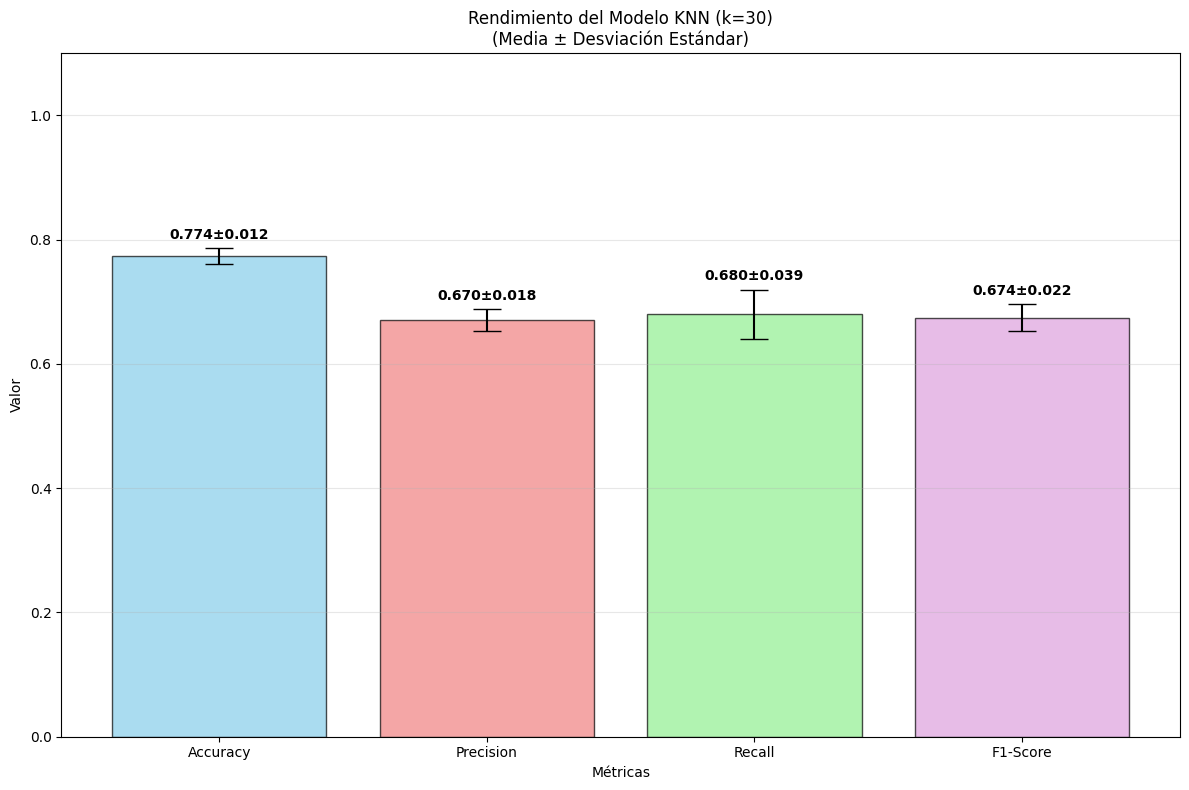

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Separación variable objetivo de los demás atributos
X = archivo.drop('Diagnosis', axis=1)
y = archivo['Diagnosis']

#Inicializar listas para almacenar métricas
accuracy_list_KNN = []
precision_list_KNN = []
recall_list_KNN = []
f1_list_KNN = []
tn_list_KNN = []
fp_list_KNN = []
fn_list_KNN = []
tp_list_KNN = []


for i in range(1, 11):
    print(f"Iteración {i}/10")
    
    #División de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    #Balancear conjunto de entrenamiento
    ros = RandomOverSampler(random_state=i)
    X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)
    
    #Estandarizar data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_balanced)
    X_test_scaled = scaler.transform(X_test)
    
    #Entrenar el modelo con el mejor K posible
    knn_model = KNeighborsClassifier(n_neighbors=30)
    knn_model.fit(X_train_scaled, y_train_balanced)
    y_pred = knn_model.predict(X_test_scaled)
    
    #Calcular métricas
    accuracy_KNN = accuracy_score(y_test, y_pred)
    precision_KNN = precision_score(y_test, y_pred)
    recall_KNN = recall_score(y_test, y_pred)
    f1_knn = f1_score(y_test, y_pred)
    
    #Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
    tn_knn, fp_knn, fn_knn, tp_knn = conf_matrix.ravel()
    
    #Agregar valores a las listas
    accuracy_list_KNN.append(accuracy_KNN)
    precision_list_KNN.append(precision_KNN)
    recall_list_KNN.append(recall_KNN)
    f1_list_KNN.append(f1_knn)
    tn_list_KNN.append(tn_knn)
    fp_list_KNN.append(fp_knn)
    fn_list_KNN.append(fn_knn)
    tp_list_KNN.append(tp_knn)
    
    #Mostrar métricas de esta iteración
    print(f"  Accuracy: {accuracy_KNN:.4f}")
    print(f"  Precision: {precision_KNN:.4f}")
    print(f"  Recall: {recall_KNN:.4f}")
    print(f"  F1-Score: {f1_knn:.4f}")


metrics_data = {
    'Accuracy': accuracy_list_KNN,
    'Precision': precision_list_KNN,
    'Recall': recall_list_KNN,
    'F1-Score': f1_list_KNN
}


#Gráfico de las métricas
plt.figure(figsize=(12, 8))
x_pos = np.arange(len(metrics_data))
means = [np.mean(values) for values in metrics_data.values()]
stds = [np.std(values) for values in metrics_data.values()]

bars = plt.bar(x_pos, means, yerr=stds, capsize=10, alpha=0.7,
               color=['skyblue', 'lightcoral', 'lightgreen', 'plum'],
               edgecolor='black', linewidth=1)

#Añadir valores en las barras
for i, (bar, mean, std) in enumerate(zip(bars, means, stds)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + std + 0.01,
             f'{mean:.3f}±{std:.3f}',
             ha='center', va='bottom', fontweight='bold')

plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Rendimiento del Modelo KNN (k=30)\n(Media ± Desviación Estándar)')
plt.xticks(x_pos, metrics_data.keys())
plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


### Modelo de Random Forest.


Iteración 1:
Exactitud: 0.9302
Precisión: 0.9556
Recall: 0.8431
F1-Score: 0.8958

Iteración 2:
Exactitud: 0.9395
Precisión: 0.9077
Recall: 0.8939
F1-Score: 0.9008

Iteración 3:
Exactitud: 0.9395
Precisión: 0.9241
Recall: 0.8993
F1-Score: 0.9116

Iteración 4:
Exactitud: 0.9419
Precisión: 0.9156
Recall: 0.9216
F1-Score: 0.9186

Iteración 5:
Exactitud: 0.9512
Precisión: 0.9252
Recall: 0.9315
F1-Score: 0.9283

Iteración 6:
Exactitud: 0.9349
Precisión: 0.9291
Recall: 0.8792
F1-Score: 0.9034

Iteración 7:
Exactitud: 0.9488
Precisión: 0.9565
Recall: 0.8919
F1-Score: 0.9231

Iteración 8:
Exactitud: 0.9465
Precisión: 0.9441
Recall: 0.9000
F1-Score: 0.9215

Iteración 9:
Exactitud: 0.9326
Precisión: 0.8961
Recall: 0.9139
F1-Score: 0.9049

Iteración 10:
Exactitud: 0.9419
Precisión: 0.9514
Recall: 0.8839
F1-Score: 0.9164


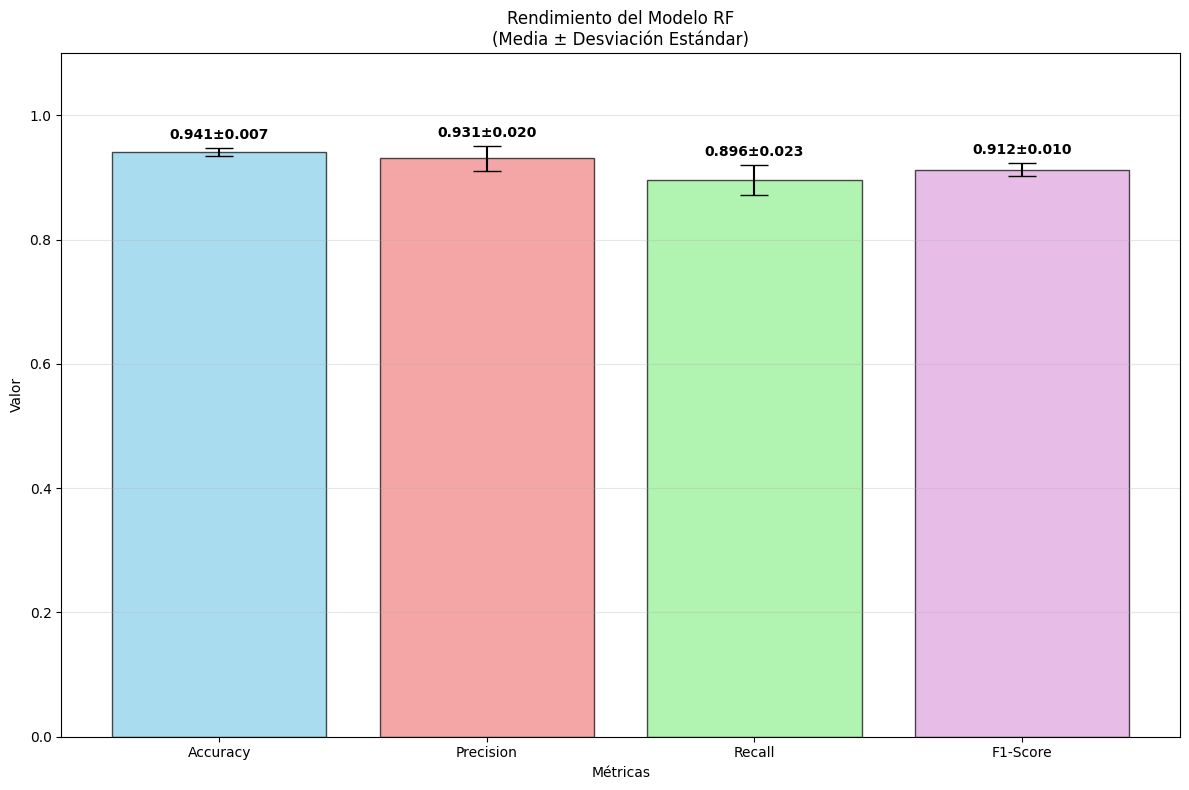


Reporte de clasificación (última iteración):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       275
           1       0.95      0.88      0.92       155

    accuracy                           0.94       430
   macro avg       0.94      0.93      0.94       430
weighted avg       0.94      0.94      0.94       430



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Separación variable objetivo de los demás atributos
X = archivo.drop('Diagnosis', axis=1)
y = archivo['Diagnosis']

#Listas para guardar las métricas
accuracy_list_RF = []
precision_list_RF = []
recall_list_RF = []
f1_list_RF = []
tn_list_RF = []
fp_list_RF = []
fn_list_RF = []
tp_list_RF = []

for i in range(1, 11):
    print(f"\nIteración {i}:")
    
    #Separar datos de entrenamiento y de testeo
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    #Balancear conjunto de entrenamiento
    ros = RandomOverSampler(random_state=i)
    X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)
    
    #Estandarizar data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_balanced)
    X_test_scaled = scaler.transform(X_test)
    
    #Entrenar el modelo
    final_forest = RandomForestClassifier(random_state=i)
    final_forest.fit(X_train_scaled, y_train_balanced)
    final_y_pred = final_forest.predict(X_test_scaled)
    
    #Calcular métricas
    final_accuracy_RF = accuracy_score(y_test, final_y_pred)
    precision_RF = precision_score(y_test, final_y_pred, zero_division=0)
    recall_RF = recall_score(y_test, final_y_pred, zero_division=0)
    f1_rf = f1_score(y_test, final_y_pred, zero_division=0)
    
    #Matriz de confusión
    final_conf_matrix = confusion_matrix(y_test, final_y_pred, labels=[1, 0])
    tn_rf, fp_rf, fn_rf, tp_rf = final_conf_matrix.ravel()
    
    #Guardar métricas en las listas
    accuracy_list_RF.append(final_accuracy_RF)
    precision_list_RF.append(precision_RF)
    recall_list_RF.append(recall_RF)
    f1_list_RF.append(f1_rf)
    tn_list_RF.append(tn_rf)
    fp_list_RF.append(fp_rf)
    fn_list_RF.append(fn_rf)
    tp_list_RF.append(tp_rf)
    
    print(f"Exactitud: {final_accuracy_RF:.4f}")
    print(f"Precisión: {precision_RF:.4f}")
    print(f"Recall: {recall_RF:.4f}")
    print(f"F1-Score: {f1_rf:.4f}")



metrics_data = {
    'Accuracy': accuracy_list_RF,
    'Precision': precision_list_RF,
    'Recall': recall_list_RF,
    'F1-Score': f1_list_RF
}


#Gráfico de las métricas
plt.figure(figsize=(12, 8))
x_pos = np.arange(len(metrics_data))
means = [np.mean(values) for values in metrics_data.values()]
stds = [np.std(values) for values in metrics_data.values()]

bars = plt.bar(x_pos, means, yerr=stds, capsize=10, alpha=0.7,
               color=['skyblue', 'lightcoral', 'lightgreen', 'plum'],
               edgecolor='black', linewidth=1)

#Añadir valores en las barras
for i, (bar, mean, std) in enumerate(zip(bars, means, stds)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + std + 0.01,
             f'{mean:.3f}±{std:.3f}',
             ha='center', va='bottom', fontweight='bold')

plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Rendimiento del Modelo RF\n(Media ± Desviación Estándar)')
plt.xticks(x_pos, metrics_data.keys())
plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Reporte de clasificación de la última iteración
print("\nReporte de clasificación (última iteración):")
print(classification_report(y_test, final_y_pred, zero_division=0))


## Modelos no supervisados.

### Modelo de K-means.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
from collections import Counter

#Separación variable objetivo de los demós atributos
X = archivo.drop('Diagnosis', axis=1)
y = archivo['Diagnosis']

#División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Estandarizar data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Entrenar el modelo final con K óptimo
best_kmeans = KMeans(n_clusters=4, random_state=42)
clusters_train = best_kmeans.fit_predict(X_train_scaled)
clusters_test = best_kmeans.predict(X_test_scaled)

#Obtener centroides
centroids = best_kmeans.cluster_centers_

#Calcular distancias al centroide para cada punto
def calculate_centroid_distances(X, clusters, centroids):
    distances = []
    for i, point in enumerate(X):
        cluster_id = clusters[i]
        centroid = centroids[cluster_id]
        distance = np.linalg.norm(point - centroid)
        distances.append(distance)
    return np.array(distances)

#Calcular distancias para train y test
distances_train = calculate_centroid_distances(X_train_scaled, clusters_train, centroids)
distances_test = calculate_centroid_distances(X_test_scaled, clusters_test, centroids)

#Estadísticas de distancias
print(f"\n=== DISTANCIAS AL CENTROIDE ===")
print(f"Distancia promedio (Train): {np.mean(distances_train):.3f}")
print(f"Distancia promedio (Test): {np.mean(distances_test):.3f}")
print(f"Desviación estándar (Train): {np.std(distances_train):.3f}")
print(f"Desviación estándar (Test): {np.std(distances_test):.3f}")

distance = np.linalg.norm(centroids[0] - centroids[1])
sh_score = silhouette_score(X_train_scaled, clusters_train)
#Resumen final con enfoque en distancias
print("\n=== RESUMEN BASADO EN DISTANCIAS AL CENTROIDE ===")
for cluster_id in np.unique(clusters_test):
    mask = clusters_test == cluster_id
    cluster_distances = distances_test[mask]
    print(f"\nCluster {cluster_id}:")
    print(f"  - Número de puntos: {len(cluster_distances)}")
    print(f"  - Distancia promedio: {np.mean(cluster_distances):.3f}")
    print(f"  - Distancia mánima: {np.min(cluster_distances):.3f}")
    print(f"  - Distancia máxima: {np.max(cluster_distances):.3f}")
    print(f"  - Desviación estándar: {np.std(cluster_distances):.3f}")

print(f"Distancia entre centroides: {distance:.3f}")
print(f"Silhouette Score: {sh_score:.3f}")

#Análisis detallado del Silhouette Score
silhouette_samples_scores = silhouette_samples(X_train_scaled, clusters_train)
print("=== DIAGNÓSTICO DEL SILHOUETTE SCORE ===")
print(f"Silhouette Score promedio: {sh_score:.3f}")
print(f"Rango del Silhouette Score: [{np.min(silhouette_samples_scores):.3f}, {np.max(silhouette_samples_scores):.3f}]")

#Análisis por cluster
for cluster_id in np.unique(clusters_train):
    cluster_silhouette_scores = silhouette_samples_scores[clusters_train == cluster_id]
    print(f"\nCluster {cluster_id}:")
    print(f"  - Silhouette promedio: {np.mean(cluster_silhouette_scores):.3f}")
    print(f"  - Puntos con score negativo: {np.sum(cluster_silhouette_scores < 0)}/{len(cluster_silhouette_scores)}")
    print(f"  - Puntos mal clasificados (%): {(np.sum(cluster_silhouette_scores < 0)/len(cluster_silhouette_scores)*100):.1f}%")

#Verificar separación de clusters
print(f"\n=== SEPARACIÓN DE CLUSTERS ===")
print(f"Distancia entre centroides: {distance:.3f}")
print(f"Distancia promedio intra-cluster: {np.mean(distances_train):.3f}")
print(f"Ratio separación/compacidad: {distance/np.mean(distances_train):.3f}")

#Análisis de tamaños de clusters
cluster_sizes = Counter(clusters_train)
print(f"\n=== TAMAÑOS DE CLUSTERS ===")
for cluster_id, size in cluster_sizes.items():
    percentage = (size / len(clusters_train)) * 100
    print(f"Cluster {cluster_id}: {size} puntos ({percentage:.1f}%)")

silhouette_scores = []
K_range = range(2, min(8, len(np.unique(y_train)) + 3))
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    temp_clusters = kmeans_temp.fit_predict(X_train_scaled)
    temp_score = silhouette_score(X_train_scaled, temp_clusters)
    silhouette_scores.append(temp_score)
    print(f"  K={k}: Silhouette = {temp_score:.3f}")

print(f"\nMejor K según Silhouette: {K_range[np.argmax(silhouette_scores)]} (Score: {max(silhouette_scores):.3f})")
ch_score = calinski_harabasz_score(X_train_scaled, clusters_train) #Razón entre dispersión entre grupos y la dispersión dentro del grupo.
db_score = davies_bouldin_score(X_train_scaled, clusters_train) #Compara la similaridad entre cada cluster y el vecino más cercano, Mide que tan separados y compactos son.
ari_score = adjusted_rand_score(y_test, clusters_test) #Similaridad entre dos clusters
print(f"CH score: {ch_score:.3f}")
print(f"DB score: {db_score:.3f}")
print(f"Adjusted Rand Index: {ari_score:.3f}")


=== DISTANCIAS AL CENTROIDE ===
Distancia promedio (Train): 5.489
Distancia promedio (Test): 5.482
Desviación estándar (Train): 0.645
Desviación estándar (Test): 0.624

=== RESUMEN BASADO EN DISTANCIAS AL CENTROIDE ===

Cluster 0:
  - Número de puntos: 57
  - Distancia promedio: 5.577
  - Distancia mánima: 4.191
  - Distancia máxima: 7.192
  - Desviación estándar: 0.646

Cluster 1:
  - Número de puntos: 165
  - Distancia promedio: 5.532
  - Distancia mánima: 4.013
  - Distancia máxima: 7.186
  - Desviación estándar: 0.633

Cluster 2:
  - Número de puntos: 61
  - Distancia promedio: 5.411
  - Distancia mánima: 4.078
  - Distancia máxima: 6.990
  - Desviación estándar: 0.551

Cluster 3:
  - Número de puntos: 147
  - Distancia promedio: 5.417
  - Distancia mánima: 3.799
  - Distancia máxima: 6.784
  - Desviación estándar: 0.623
Distancia entre centroides: 2.991
Silhouette Score: 0.030
=== DIAGNÓSTICO DEL SILHOUETTE SCORE ===
Silhouette Score promedio: 0.030
Rango del Silhouette Score: [-